# Import Package yang digunakan

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Upload data

In [3]:
from google.colab import files
upload = files.upload()

Saving credit_risk_dataset.csv to credit_risk_dataset.csv


In [43]:
df = pd.read_csv('credit_risk_dataset.csv', sep=',')
print(df)

       person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \

In [44]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# EDA

## Stastik Deskriptif

In [45]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Pendektesian outlier

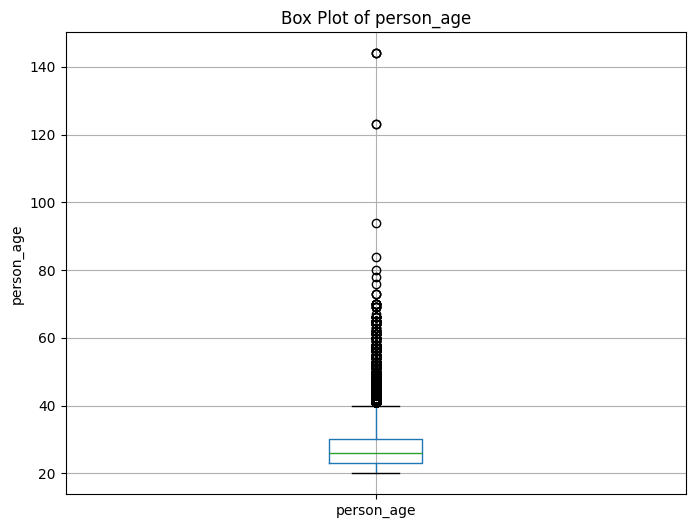

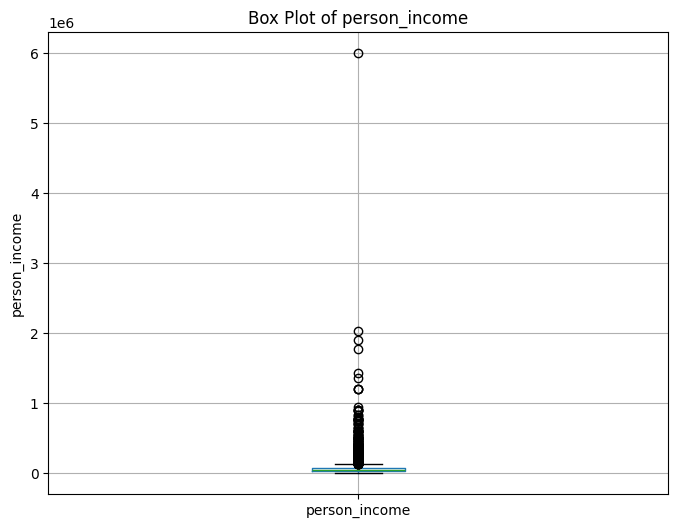

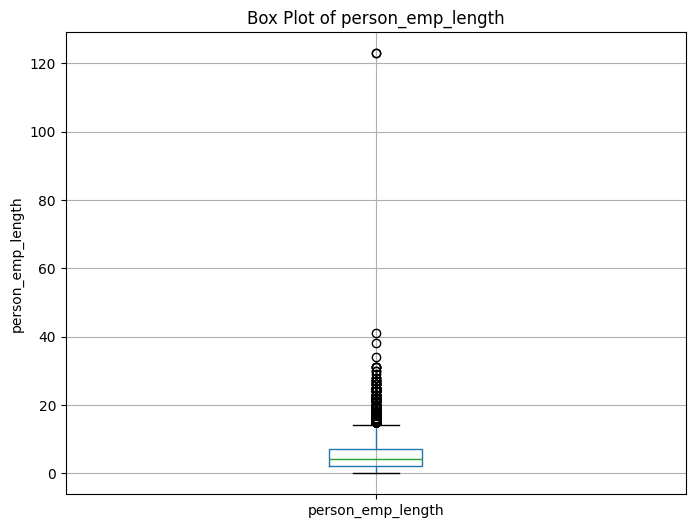

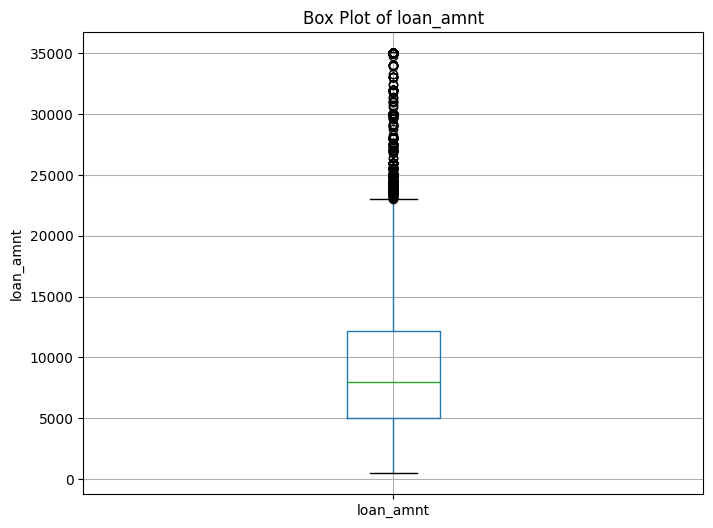

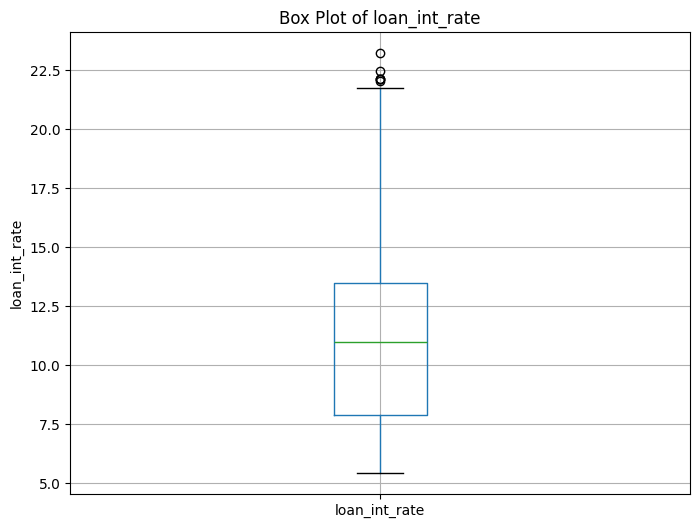

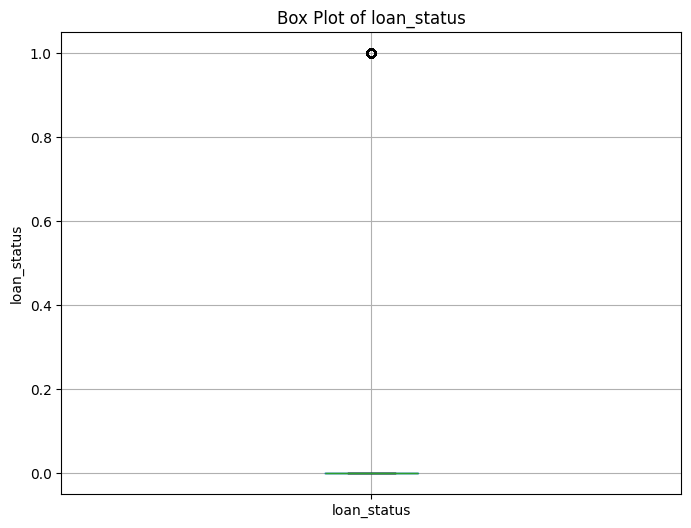

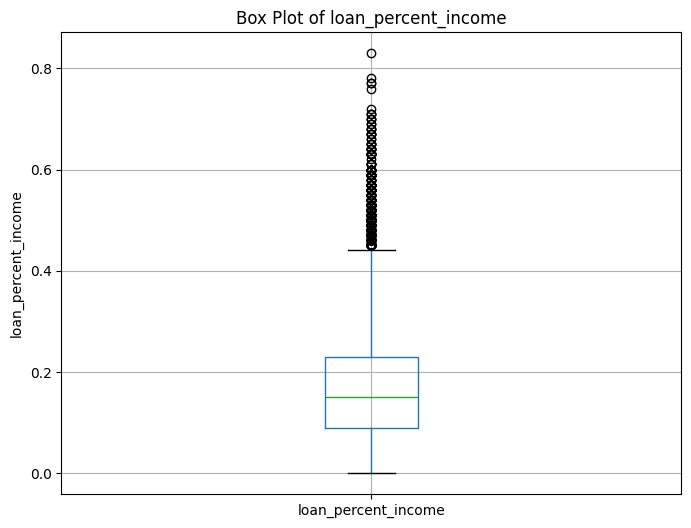

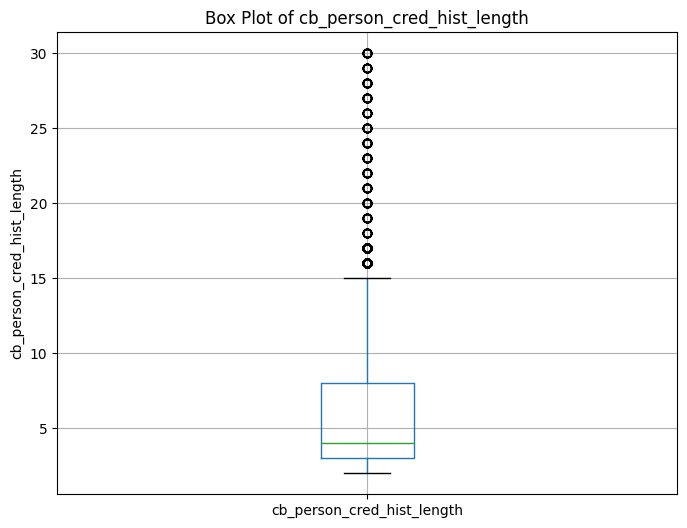

In [46]:
# Melihat visualisasi boxplot untuk pendeteksian outlier
import matplotlib.pyplot as plt

# Loop through each numerical column and create a separate box plot
for column in df.select_dtypes(include=['number']):
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    df.boxplot(column=[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Pemeriksaan nilai duplikasi

In [48]:
# Check nilai duplicate
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))
print("\nDuplicate Rows:\n", duplicate_rows)

Number of duplicate rows: 165

Duplicate Rows:
        person_age  person_income person_home_ownership  person_emp_length  \
15975          23          42000                  RENT                5.0   
15989          23          90000              MORTGAGE                7.0   
15995          24          48000              MORTGAGE                4.0   
16025          24          10000                  RENT                8.0   
16028          23         100000              MORTGAGE                7.0   
...           ...            ...                   ...                ...   
32010          42          39996              MORTGAGE                2.0   
32047          36         250000                  RENT                2.0   
32172          49         120000              MORTGAGE               12.0   
32259          39          40000                   OWN                4.0   
32279          43          11340                  RENT                4.0   

             loan_intent lo

In [49]:
# Check for missing values
print(df.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


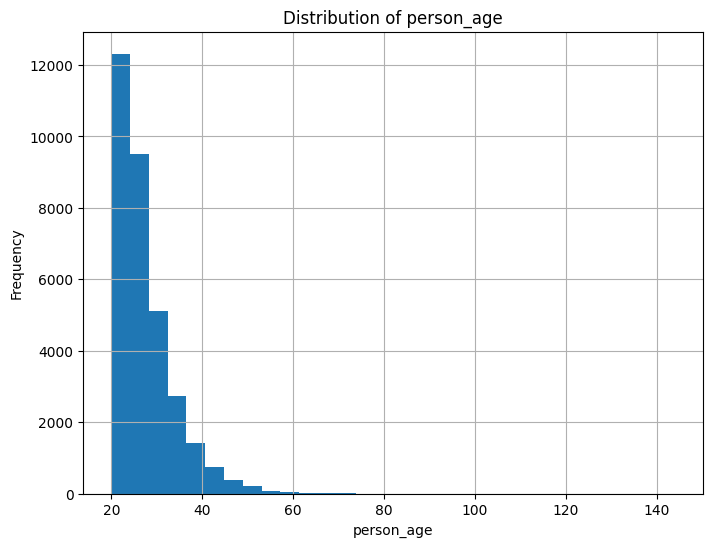

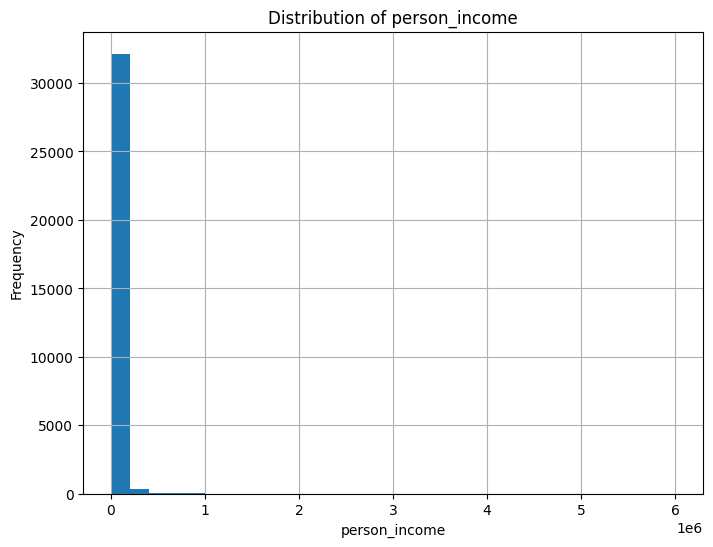

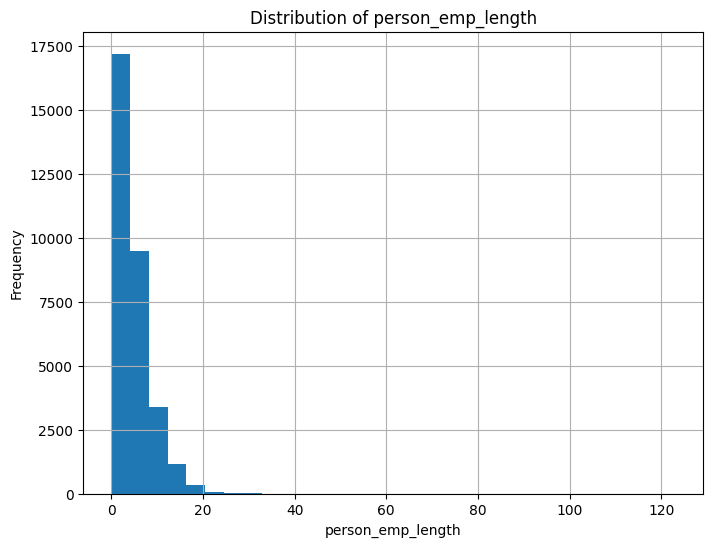

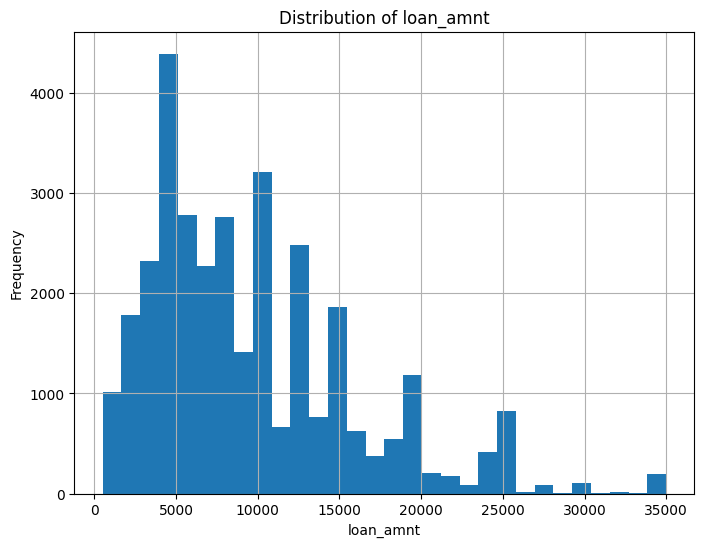

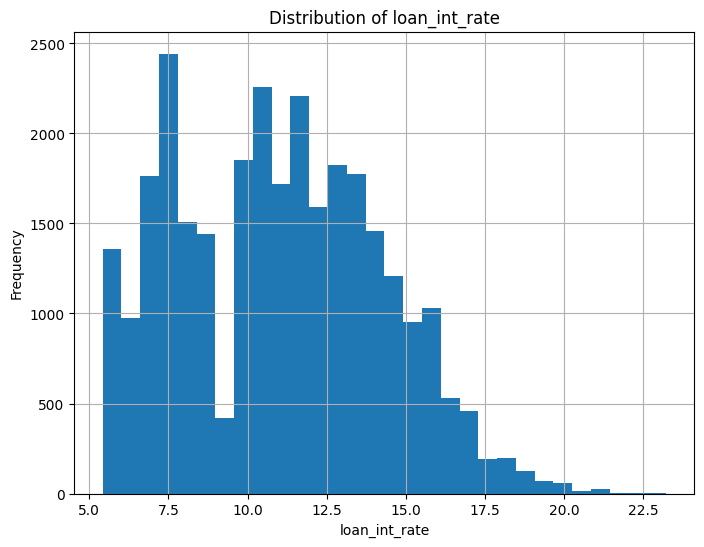

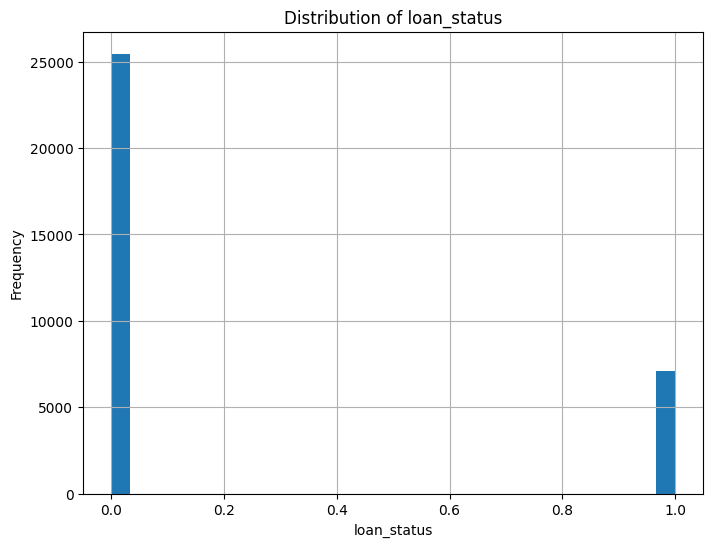

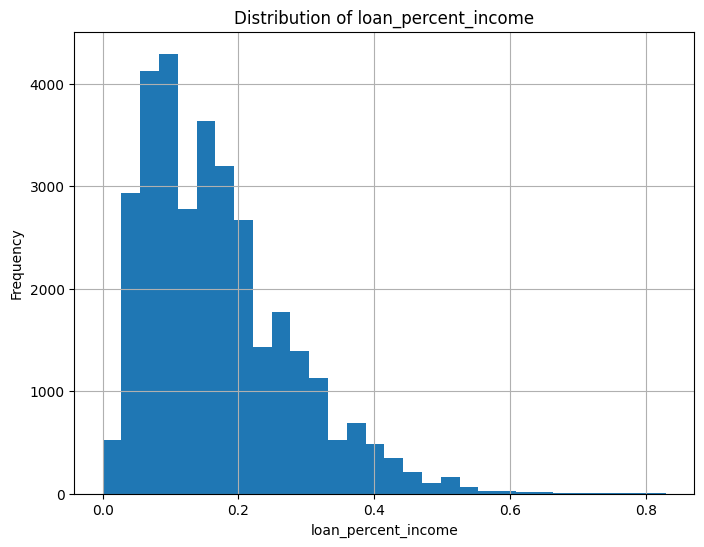

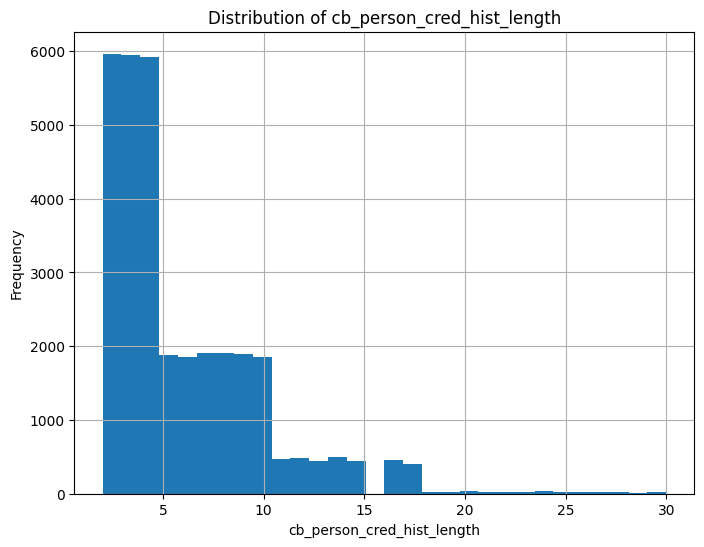

In [50]:
# Memeriksa apakah data sudah seimbang
# Check the distribution of data for each numerical column using histograms
for column in df.select_dtypes(include=['number']):
    plt.figure(figsize=(8, 6))
    df[column].hist(bins=30)  # Adjust the number of bins as needed
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

loan_status
0    25473
1     7108
Name: count, dtype: int64

Percentage of each class:
 loan_status
0    78.183604
1    21.816396
Name: proportion, dtype: float64


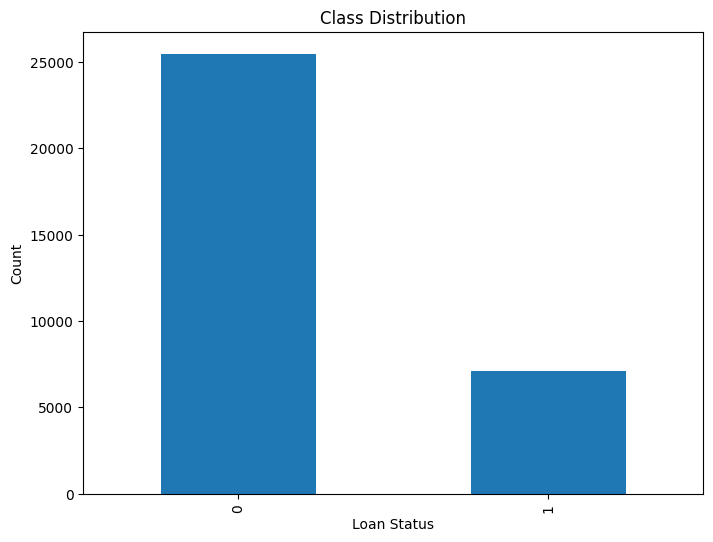

In [51]:
# prompt: check apakah data sudah seimbang

# Check class distribution
print(df['loan_status'].value_counts())

# Calculate percentage of each class
class_percentages = df['loan_status'].value_counts(normalize=True) * 100
print("\nPercentage of each class:\n", class_percentages)

# Plot class distribution
plt.figure(figsize=(8, 6))
df['loan_status'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# Data preprocessing


In [53]:
# prompt: coding mengisi missing value dengan nilai rata-rata
for col in ['person_emp_length', 'loan_int_rate']:
    df[col] = df[col].fillna(df[col].mean())
print(df.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [54]:
# prompt: split kolom usia dibawah 40 tahun dengan usia diatas 40 tahun

# Split the data based on age
df_below_40 = df[df['person_age'] < 40]
df_above_40 = df[df['person_age'] >= 40]

# Now you have two separate DataFrames:
# df_below_40 contains data for people under 40
# df_above_40 contains data for people 40 and above

print("People below 40:\n", df_below_40)
print("\nPeople above or equal to 40:\n", df_above_40)

People below 40:
        person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32288          38          99996                   OWN               22.0   
32290          37          90000              MORTGAGE               11.0   
32292          38         200000              MORTGAGE                0.0   
32293          38         110000              MORTGAGE                5.0   
32294          36          92000              MORTGAGE               18.0   

             loan_intent loan_grade  loan_amnt  loan_int_

In [55]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame and you want to scale numerical features
numerical_cols = df.select_dtypes(include=['number']).columns

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numerical features
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Now 'df' contains the MinMax scaled numerical features
print(df.head())

   person_age  person_income person_home_ownership  person_emp_length  \
0    0.016129       0.009173                  RENT           1.000000   
1    0.008065       0.000934                   OWN           0.040650   
2    0.040323       0.000934              MORTGAGE           0.008130   
3    0.024194       0.010257                  RENT           0.032520   
4    0.032258       0.008406                  RENT           0.065041   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D   1.000000       0.595506          1.0   
1   EDUCATION          B   0.014493       0.321348          0.0   
2     MEDICAL          C   0.144928       0.418539          1.0   
3     MEDICAL          C   1.000000       0.551124          1.0   
4     MEDICAL          C   1.000000       0.497191          1.0   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0             0.710843                         Y                    0.035714  


In [56]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,0.062376,0.010353,0.038941,0.263460,0.314140,0.218164,0.205064,0.135865
std,0.051194,0.010337,0.033214,0.183249,0.173124,0.413006,0.128653,0.144821
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.024194,0.005754,0.016260,0.130435,0.172472,0.000000,0.108434,0.035714
50%,0.048387,0.008506,0.032520,0.217391,0.314140,0.000000,0.180723,0.071429
75%,0.080645,0.012542,0.056911,0.339130,0.432022,0.000000,0.277108,0.214286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
# prompt: label encoding untuk data ordinal

# Label Encoding for Ordinal Data
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and you have ordinal columns like 'person_home_ownership'
ordinal_cols = ['loan_grade', 'cb_person_default_on_file'] # Example, replace with your actual ordinal columns

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Loop through each ordinal column and apply label encoding
for col in ordinal_cols:
    # Fit and transform the column
    df[col] = label_encoder.fit_transform(df[col])

# Print the updated DataFrame
print(df.head())

   person_age  person_income person_home_ownership  person_emp_length  \
0    0.016129       0.009173                  RENT           1.000000   
1    0.008065       0.000934                   OWN           0.040650   
2    0.040323       0.000934              MORTGAGE           0.008130   
3    0.024194       0.010257                  RENT           0.032520   
4    0.032258       0.008406                  RENT           0.065041   

  loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL           3   1.000000       0.595506          1.0   
1   EDUCATION           1   0.014493       0.321348          0.0   
2     MEDICAL           2   0.144928       0.418539          1.0   
3     MEDICAL           2   1.000000       0.551124          1.0   
4     MEDICAL           2   1.000000       0.497191          1.0   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  
0             0.710843                          1                    0.0

In [59]:
print(df.columns)

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')


In [60]:
# prompt: coding one hot encoding

# Perform one-hot encoding on categorical features
categorical_cols = ['person_home_ownership', 'loan_intent']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df.head())


   person_age  person_income  person_emp_length  loan_grade  loan_amnt  \
0    0.016129       0.009173           1.000000           3   1.000000   
1    0.008065       0.000934           0.040650           1   0.014493   
2    0.040323       0.000934           0.008130           2   0.144928   
3    0.024194       0.010257           0.032520           2   1.000000   
4    0.032258       0.008406           0.065041           2   1.000000   

   loan_int_rate  loan_status  loan_percent_income  cb_person_default_on_file  \
0       0.595506          1.0             0.710843                          1   
1       0.321348          0.0             0.120482                          0   
2       0.418539          1.0             0.686747                          0   
3       0.551124          1.0             0.638554                          0   
4       0.497191          1.0             0.662651                          1   

   cb_person_cred_hist_length  person_home_ownership_OTHER  \
0     

                        Feature  Importance
6           loan_percent_income    0.223367
1                 person_income    0.151625
3                    loan_grade    0.119096
5                 loan_int_rate    0.100956
11   person_home_ownership_RENT    0.083941
4                     loan_amnt    0.071287
2             person_emp_length    0.061497
0                    person_age    0.046070
8    cb_person_cred_hist_length    0.034975
14          loan_intent_MEDICAL    0.017172
12        loan_intent_EDUCATION    0.016381
13  loan_intent_HOMEIMPROVEMENT    0.016292
10    person_home_ownership_OWN    0.016157
15         loan_intent_PERSONAL    0.015266
16          loan_intent_VENTURE    0.013032
7     cb_person_default_on_file    0.011744
9   person_home_ownership_OTHER    0.001141


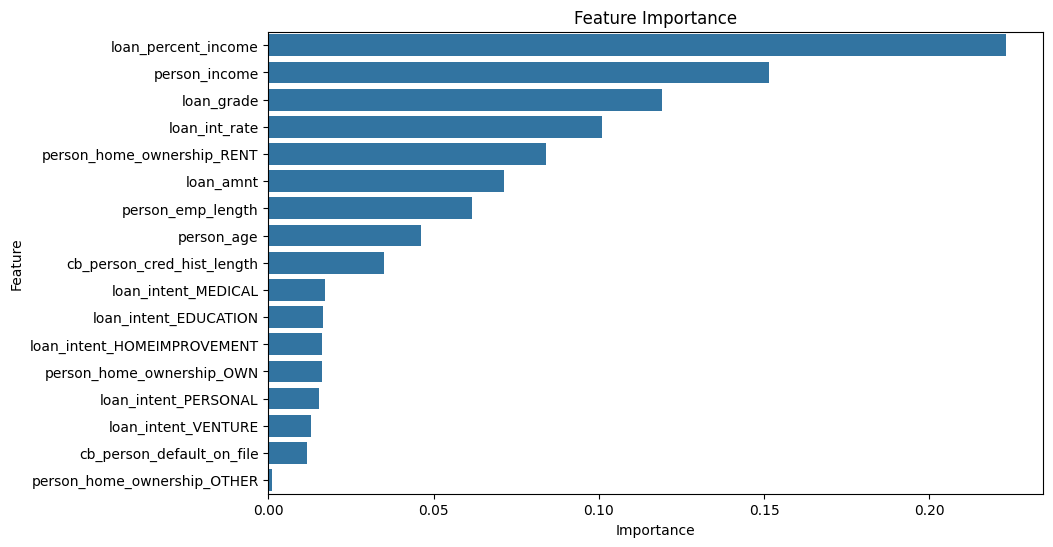

In [61]:
# prompt: feautre importance

from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# Assuming 'X' contains your features and 'y' contains your target variable ('loan_status')
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier (or another suitable tree-based model)
model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)

# You can visualize the feature importances using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# Penerapan machine learning

## Tanpa melakukan resampling

### Random forest


In [62]:
# Identify features with importance less than 0.05
features_to_remove = feature_importance_df[feature_importance_df['Importance'] < 0.05]['Feature'].tolist()

# Remove the identified features from the DataFrame
X = X.drop(columns=features_to_remove)

# Split data into training and testing sets again after removing features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a new RandomForestClassifier with the same random_state
model_reduced = RandomForestClassifier(random_state=42)

# Train the new model with the reduced feature set
model_reduced.fit(X_train, y_train)

# Evaluate the model (optional)
y_pred_reduced = model_reduced.predict(X_test)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print(f"Accuracy after feature removal: {accuracy_reduced}")
print(classification_report(y_test, y_pred_reduced))

Accuracy after feature removal: 0.9106951051097131
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      5072
         1.0       0.90      0.67      0.77      1445

    accuracy                           0.91      6517
   macro avg       0.91      0.83      0.86      6517
weighted avg       0.91      0.91      0.91      6517



## Dengan melakukan penyeimbangan data

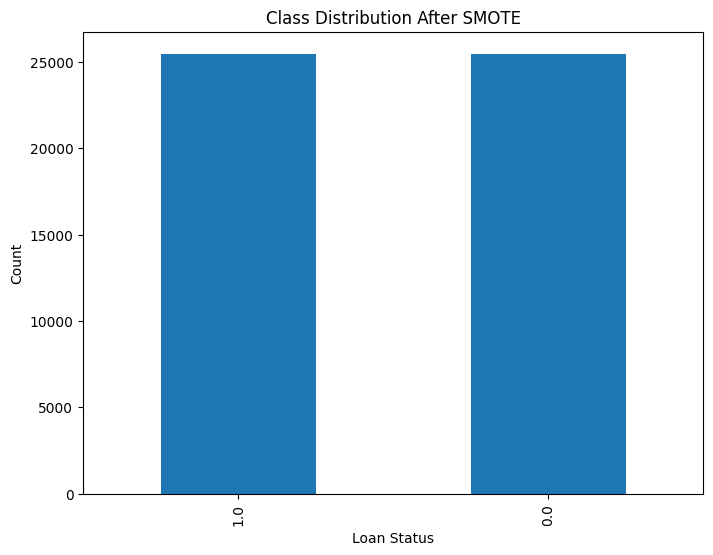

In [63]:
# prompt: melakukan penyeimbangan data dan visualisasinya tanpa melakukan random forest
from imblearn.over_sampling import SMOTE
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Visualize the class distribution after resampling
plt.figure(figsize=(8, 6))
pd.Series(y_resampled).value_counts().plot(kind='bar')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


In [64]:
# prompt: melakukan klasifikasi dengan random forest

# Split data into training and testing sets after resampling
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Initialize and train a RandomForestClassifier with the resampled data
model_resampled = RandomForestClassifier(random_state=42)
model_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_resampled = model_resampled.predict(X_test_resampled)

# Evaluate the model
accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
print(f"Accuracy after resampling: {accuracy_resampled}")
print(classification_report(y_test_resampled, y_pred_resampled))

Accuracy after resampling: 0.9269872423945044
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      5094
         1.0       0.95      0.90      0.93      5096

    accuracy                           0.93     10190
   macro avg       0.93      0.93      0.93     10190
weighted avg       0.93      0.93      0.93     10190

